In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fraud-detection/fraudTest.csv
/kaggle/input/fraud-detection/fraudTrain.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import svm
from sklearn.svm import SVC
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize':(15,8)})
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df3=pd.read_csv('../input/fraud-detection/fraudTrain.csv')

In [4]:
colunas_unnamed = [coluna for coluna in df3.columns if 'Unnamed' in coluna]

if colunas_unnamed:
    df3.drop(columns=colunas_unnamed, inplace=True)

In [5]:
df3.drop_duplicates(inplace=True)

In [6]:
def clean_df(df3):
    return df3.drop(['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'trans_num','lat','long','city_pop','merch_lat','merch_long','unix_time'],axis=1)

df3 = clean_df(df3)

<Axes: >

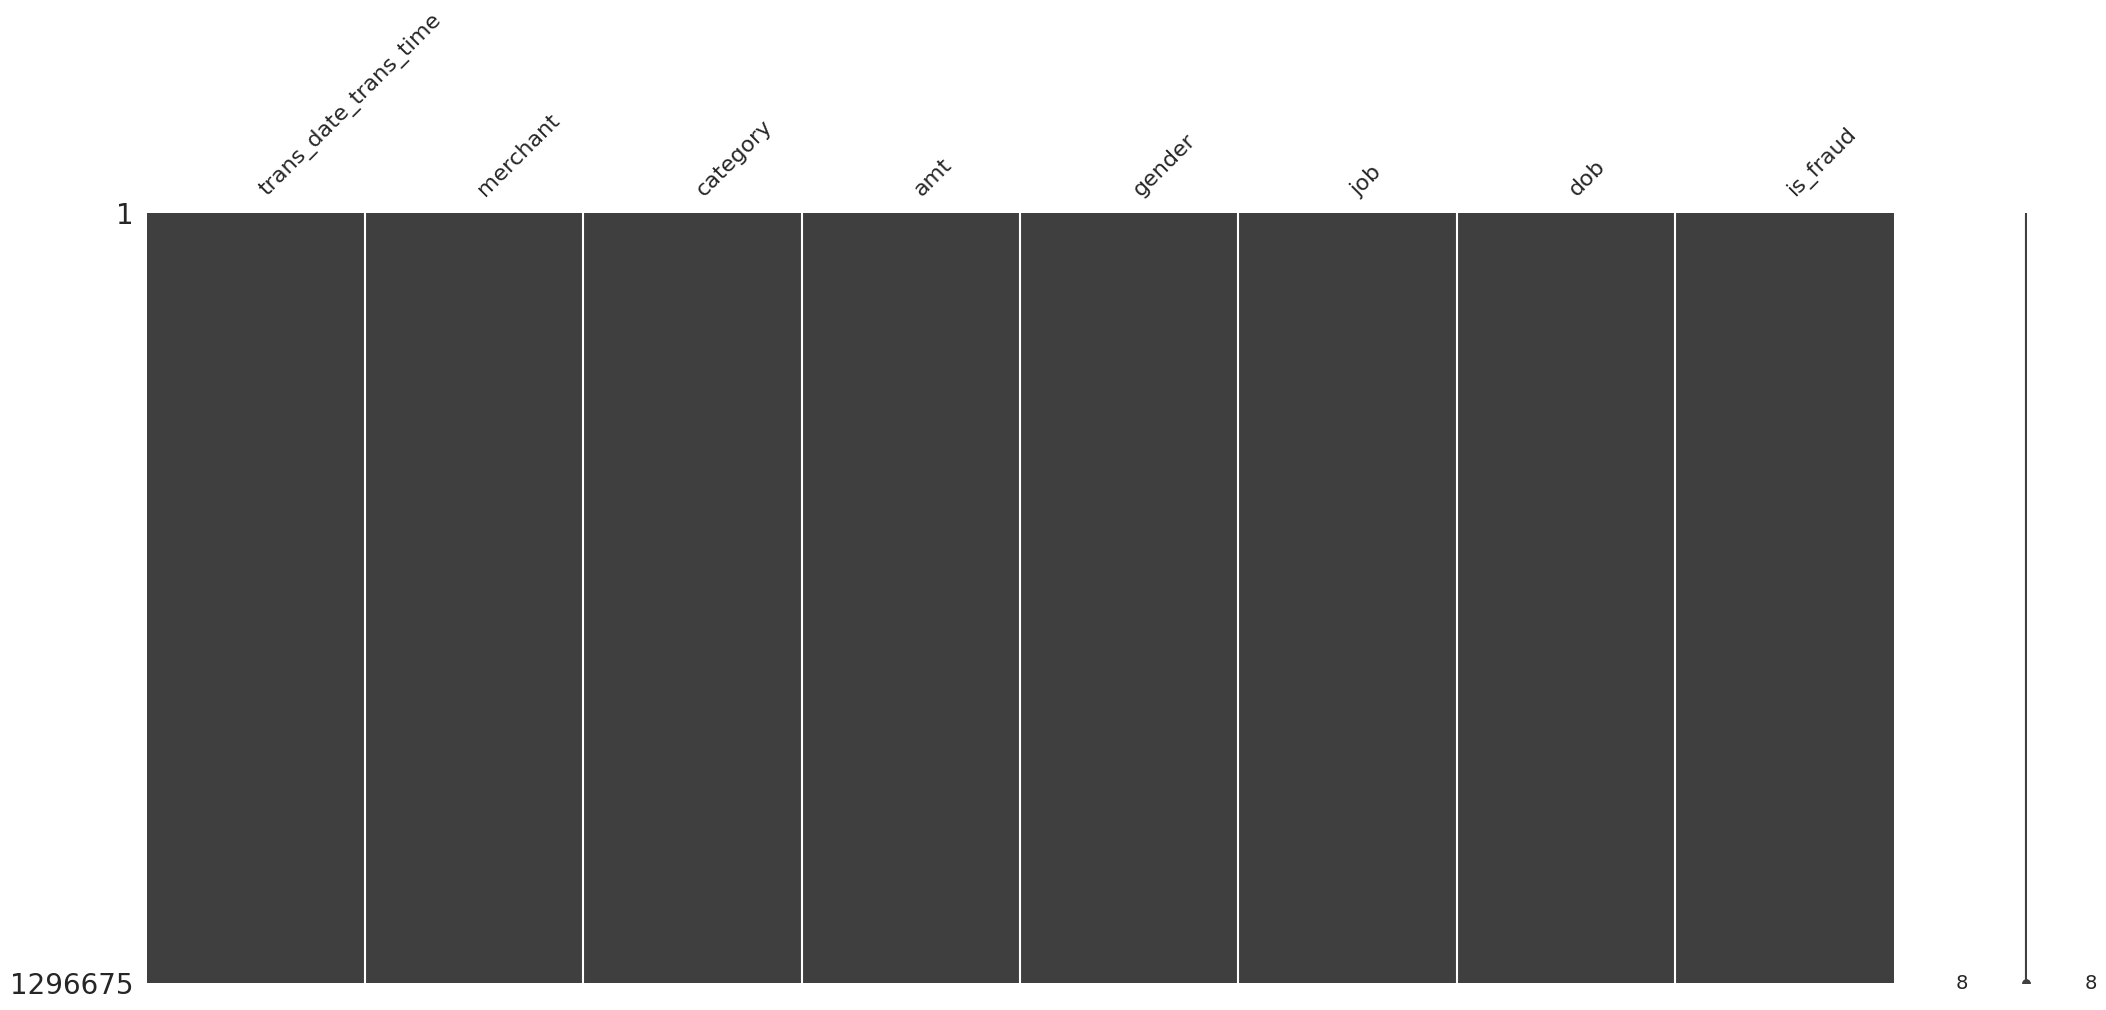

In [7]:
import missingno as msno
msno.matrix(df3)

In [8]:
df3['trans_date_trans_time'] = pd.to_datetime(df3['trans_date_trans_time'],format='%Y-%m-%d %H:%M:%S')

df3['hour'] = df3['trans_date_trans_time'].dt.hour
df3['day'] = df3['trans_date_trans_time'].dt.day
df3['day_of_week'] = df3['trans_date_trans_time'].dt.dayofweek 
df3['month'] = df3['trans_date_trans_time'].dt.month
df3['quarter'] = df3['trans_date_trans_time'].dt.quarter
df3.head()

,trans_date_trans_time,merchant,category,amt,gender,job,dob,is_fraud,hour,day,day_of_week,month,quarter
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,"Psychologist, counselling",1988-03-09,0,0,1,1,1,1
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Special educational needs teacher,1978-06-21,0,0,1,1,1,1
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Nature conservation officer,1962-01-19,0,0,1,1,1,1
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Patent attorney,1967-01-12,0,0,1,1,1,1
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Dance movement psychotherapist,1986-03-28,0,0,1,1,1,1


In [9]:
df3['dob'] = pd.to_datetime(df3['dob'], format='%Y-%m-%d')

current_date = pd.to_datetime('today')
df3['age_cust'] = (current_date.year - df3['dob'].dt.year).astype(int)

print(df3[['dob', 'age_cust']])

               dob  age_cust
0       1988-03-09        36
1       1978-06-21        46
2       1962-01-19        62
3       1967-01-12        57
4       1986-03-28        38
...            ...       ...
1296670 1961-11-24        63
1296671 1979-12-11        45
1296672 1967-08-30        57
1296673 1980-08-18        44
1296674 1995-08-16        29

[1296675 rows x 2 columns]


In [10]:
bins = [0, 18, 30, 40, 50, 60, 70, 80, 90, 100]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9] 

df3['age_group'] = pd.cut(df3['age_cust'], bins=bins, labels=labels, right=False)

df3.head()

,trans_date_trans_time,merchant,category,amt,gender,job,dob,is_fraud,hour,day,day_of_week,month,quarter,age_cust,age_group
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,"Psychologist, counselling",1988-03-09,0,0,1,1,1,1,36,3
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,Special educational needs teacher,1978-06-21,0,0,1,1,1,1,46,4
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,220.11,M,Nature conservation officer,1962-01-19,0,0,1,1,1,1,62,6
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,Patent attorney,1967-01-12,0,0,1,1,1,1,57,5
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,41.96,M,Dance movement psychotherapist,1986-03-28,0,0,1,1,1,1,38,3


In [11]:
num_bins = 300  

df3['amt'] = pd.cut(df3['amt'], bins=num_bins, labels=False, right=False)

df3.head()

,trans_date_trans_time,merchant,category,amt,gender,job,dob,is_fraud,hour,day,day_of_week,month,quarter,age_cust,age_group
0,2019-01-01 00:00:18,"fraud_Rippin, Kub and Mann",misc_net,0,F,"Psychologist, counselling",1988-03-09,0,0,1,1,1,1,36,3
1,2019-01-01 00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,1,F,Special educational needs teacher,1978-06-21,0,0,1,1,1,1,46,4
2,2019-01-01 00:00:51,fraud_Lind-Buckridge,entertainment,2,M,Nature conservation officer,1962-01-19,0,0,1,1,1,1,62,6
3,2019-01-01 00:01:16,"fraud_Kutch, Hermiston and Farrell",gas_transport,0,M,Patent attorney,1967-01-12,0,0,1,1,1,1,57,5
4,2019-01-01 00:03:06,fraud_Keeling-Crist,misc_pos,0,M,Dance movement psychotherapist,1986-03-28,0,0,1,1,1,1,38,3


In [12]:
def clean_df(df3):
    return df3.drop(['trans_date_trans_time','dob','age_cust'],axis=1)

df3 = clean_df(df3)

In [13]:
df3['merchant'] = df3['merchant'].apply(lambda x : x.replace('fraud_',''))
df3[['merchant']].head()

,merchant
0,"Rippin, Kub and Mann"
1,"Heller, Gutmann and Zieme"
2,Lind-Buckridge
3,"Kutch, Hermiston and Farrell"
4,Keeling-Crist


In [14]:
encoder = LabelEncoder()

def encode(df3):
    df3['merchant'] = encoder.fit_transform(df3['merchant'])
    df3['category'] = encoder.fit_transform(df3['category'])
    df3['job'] = encoder.fit_transform(df3['job'])
    return df3

df3 = encode(df3)

df3.head()

,merchant,category,amt,gender,job,is_fraud,hour,day,day_of_week,month,quarter,age_group
0,514,8,0,F,370,0,0,1,1,1,1,3
1,241,4,1,F,428,0,0,1,1,1,1,4
2,390,0,2,M,307,0,0,1,1,1,1,6
3,360,2,0,M,328,0,0,1,1,1,1,5
4,297,9,0,M,116,0,0,1,1,1,1,3


In [15]:
df3 = pd.get_dummies(df3, columns=['gender'], prefix='gender')

df3['gender_M'] = df3['gender_M'].astype(int)
df3['gender_F'] = df3['gender_F'].astype(int)

df3.head()

,merchant,category,amt,job,is_fraud,hour,day,day_of_week,month,quarter,age_group,gender_F,gender_M
0,514,8,0,370,0,0,1,1,1,1,3,1,0
1,241,4,1,428,0,0,1,1,1,1,4,1,0
2,390,0,2,307,0,0,1,1,1,1,6,0,1
3,360,2,0,328,0,0,1,1,1,1,5,0,1
4,297,9,0,116,0,0,1,1,1,1,3,0,1


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 13 columns):
 #   Column       Non-Null Count    Dtype   
---  ------       --------------    -----   
 0   merchant     1296675 non-null  int64   
 1   category     1296675 non-null  int64   
 2   amt          1296675 non-null  int64   
 3   job          1296675 non-null  int64   
 4   is_fraud     1296675 non-null  int64   
 5   hour         1296675 non-null  int32   
 6   day          1296675 non-null  int32   
 7   day_of_week  1296675 non-null  int32   
 8   month        1296675 non-null  int32   
 9   quarter      1296675 non-null  int32   
 10  age_group    1296139 non-null  category
 11  gender_F     1296675 non-null  int64   
 12  gender_M     1296675 non-null  int64   
dtypes: category(1), int32(5), int64(7)
memory usage: 95.2 MB


# Previsão de Dados

# Regressão Linear

In [ ]:
from sklearn.model_selection import train_test_split
fromfrom sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

rounded_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

accuracy = accuracy_score(y_test, rounded_predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, rounded_predictions)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, rounded_predictions)
recall = recall_score(y_test, rounded_predictions)
f1 = f1_score(y_test, rounded_predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

print("First 10 Predictions:", rounded_predictions[:10])

In [ ]:
from sklearn.model_selection import train_test_split
fromfrom sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.5, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

rounded_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

accuracy = accuracy_score(y_test, rounded_predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, rounded_predictions)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, rounded_predictions)
recall = recall_score(y_test, rounded_predictions)
f1 = f1_score(y_test, rounded_predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

print("First 10 Predictions:", rounded_predictions[:10])

In [ ]:
from sklearn.model_selection import train_test_split
fromfrom sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.8, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

rounded_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

accuracy = accuracy_score(y_test, rounded_predictions)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, rounded_predictions)
print("Confusion Matrix:")
print(conf_matrix)

precision = precision_score(y_test, rounded_predictions)
recall = recall_score(y_test, rounded_predictions)
f1 = f1_score(y_test, rounded_predictions)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

auc_roc = roc_auc_score(y_test, predictions)
print("AUC-ROC:", auc_roc)

print("First 10 Predictions:", rounded_predictions[:10])

# Regressão Logística

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)

# Extraindo os coeficientes do modelo de regressão logística
coefficients = model.coef_

# Exibindo os coeficientes e as características correspondentes
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients[0]})
print("Feature Coefficients:")
print(feature_coefficients)

# Adicionando as previsões ao DataFrame de teste
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_is_fraud'] = predictions

# Exibindo as características e as previsões
print("Features and Predicted is_fraud:")
print(X_test_with_predictions)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.5, random_state=42)

# Inicializando e treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)

# Extraindo os coeficientes do modelo de regressão logística
coefficients = model.coef_

# Exibindo os coeficientes e as características correspondentes
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients[0]})
print("Feature Coefficients:")
print(feature_coefficients)

# Adicionando as previsões ao DataFrame de teste
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_is_fraud'] = predictions

# Exibindo as características e as previsões
print("Features and Predicted is_fraud:")
print(X_test_with_predictions)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.8, random_state=42)

# Inicializando e treinando o modelo de regressão logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = model.predict(X_test)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)

# Extraindo os coeficientes do modelo de regressão logística
coefficients = model.coef_

# Exibindo os coeficientes e as características correspondentes
feature_coefficients = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients[0]})
print("Feature Coefficients:")
print(feature_coefficients)

# Adicionando as previsões ao DataFrame de teste
X_test_with_predictions = X_test.copy()
X_test_with_predictions['Predicted_is_fraud'] = predictions

# Exibindo as características e as previsões
print("Features and Predicted is_fraud:")
print(X_test_with_predictions)

# Arvores da Decisão

Accuracy: 0.9959396147839666
Precision: 0.7068201948627104
Recall: 0.525
F1-Score: 0.6024915062287657
AUC-ROC: 0.7618580668308671
Confusion Matrix:
[[257484    331]
 [   722    798]]


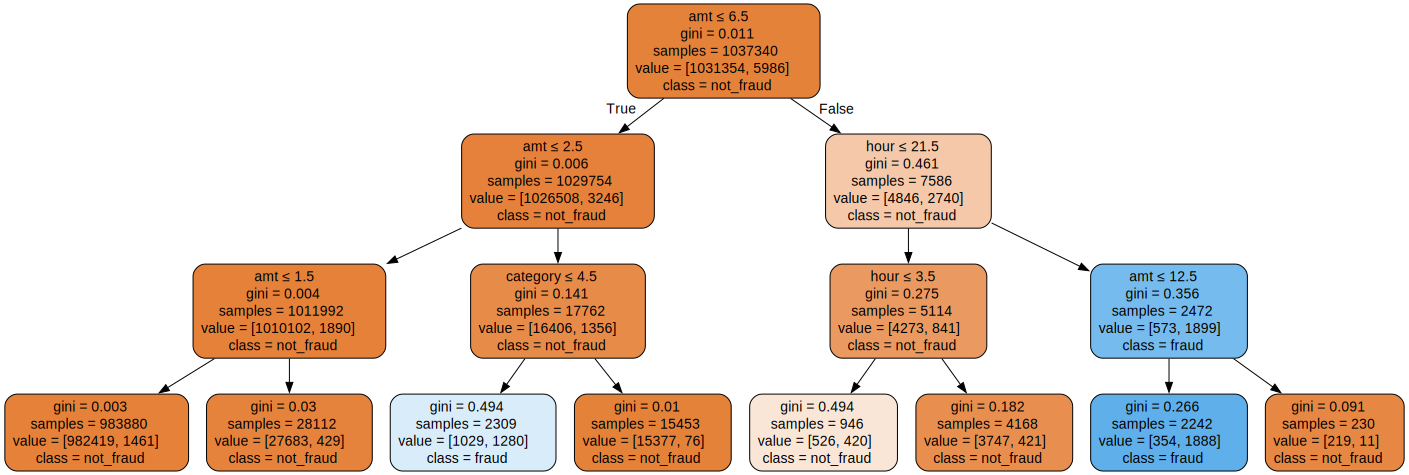

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import graphviz

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de árvore de decisão
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = decision_tree_model.predict(X_test)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizando a árvore de decisão
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=df3.drop('is_fraud', axis=1).columns,  
                           class_names=['not_fraud', 'fraud'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("fraud_detection_tree")  # Salvando a árvore em um arquivo
graph



Accuracy: 0.9959681524143271
Precision: 0.7014767932489452
Recall: 0.5305851063829787
F1-Score: 0.6041792852816474
AUC-ROC: 0.7646339827779786
Confusion Matrix:
[[643729    849]
 [  1765   1995]]


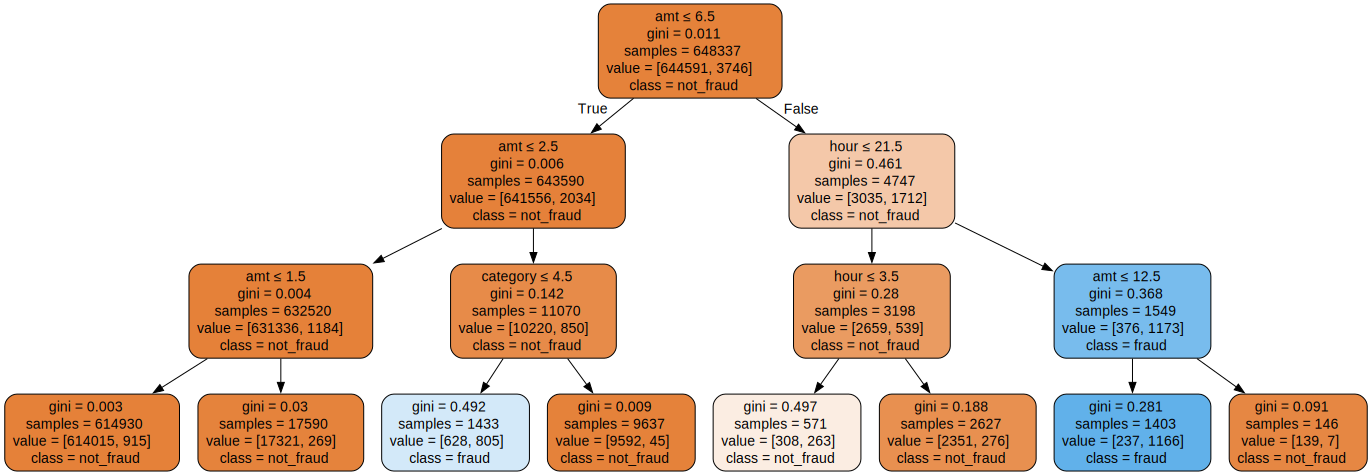

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import graphviz

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.5, random_state=42)

# Inicializando e treinando o modelo de árvore de decisão
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = decision_tree_model.predict(X_test)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizando a árvore de decisão
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=df3.drop('is_fraud', axis=1).columns,  
                           class_names=['not_fraud', 'fraud'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("fraud_detection_tree2")  # Salvando a árvore em um arquivo
graph




Accuracy: 0.9959106946613454
Precision: 0.6955849889624725
Recall: 0.5239441303624875
F1-Score: 0.5976858877086495
AUC-ROC: 0.7613035083912473
Confusion Matrix:
[[1029947    1379]
 [   2863    3151]]


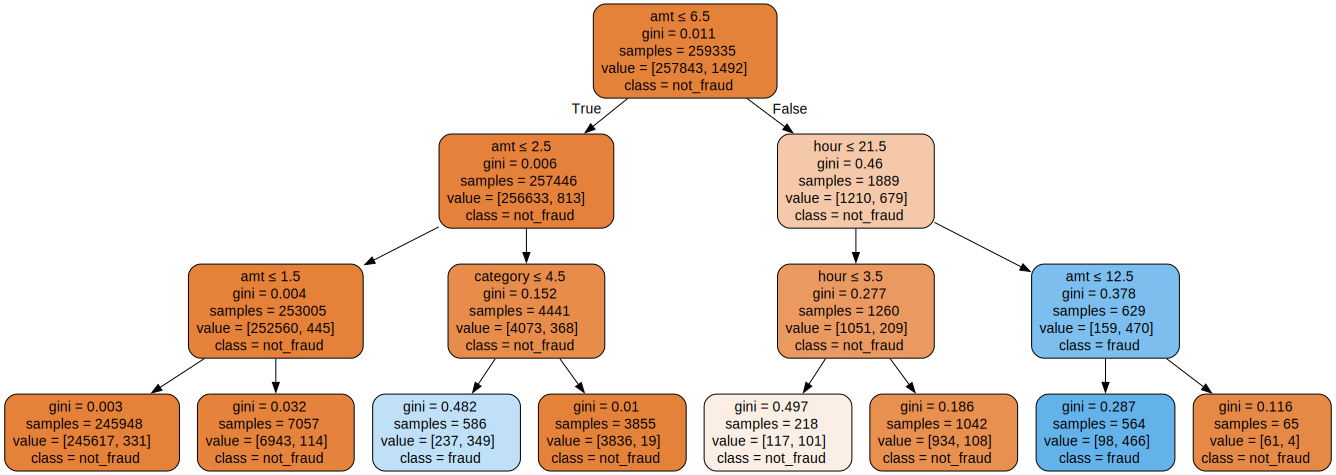

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import graphviz

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.8, random_state=42)

# Inicializando e treinando o modelo de árvore de decisão
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
predictions = decision_tree_model.predict(X_test)

# Calculando métricas de avaliação
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
auc_roc = roc_auc_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC:", auc_roc)
print("Confusion Matrix:")
print(conf_matrix)

# Visualizando a árvore de decisão
dot_data = export_graphviz(decision_tree_model, out_file=None, 
                           feature_names=df3.drop('is_fraud', axis=1).columns,  
                           class_names=['not_fraud', 'fraud'],  
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("fraud_detection_tree3")  # Salvando a árvore em um arquivo
graph



# Random Florest

Random Forest Metrics:
Accuracy: 0.9976632540921974
Precision: 0.9506903353057199
Recall: 0.6342105263157894
F1-Score: 0.7608524072612469
AUC-ROC: 0.8170082944012282
Confusion Matrix:
[[257765     50]
 [   556    964]]
Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0

Previsão: Não Fraude
Probabilidade de Fraude: 0.0



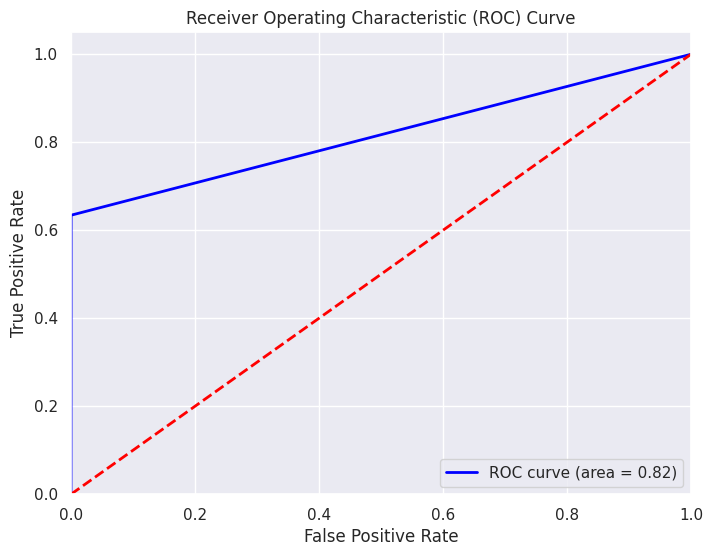

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Metrics:
Accuracy: 0.9977403744191875
Precision: 0.9560546875
Recall: 0.6440789473684211
F1-Score: 0.7696540880503145
AUC-ROC: 0.8219522018032106
Confusion Matrix:
[[257770     45]
 [   541    979]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.2, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.5, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Metrics:
Accuracy: 0.9978560549096728
Precision: 0.9625719769673704
Recall: 0.6598684210526315
F1-Score: 0.7829820452771272
AUC-ROC: 0.8298585748961158
Confusion Matrix:
[[257776     39]
 [   517   1003]]


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.5, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Random Forest Metrics:
Accuracy: 0.9977141552708618
Precision: 0.950910530482977
Recall: 0.6388297872340426
F1-Score: 0.7642379891823098
AUC-ROC: 0.8193187066543884
Confusion Matrix:
[[644454    124]
 [  1358   2402]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.5, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.8, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=10, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.8, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import pandas as pd
import matplotlib.pyplot as plt

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(
    df3.drop('is_fraud', axis=1), df3['is_fraud'], test_size=0.8, random_state=42)

# Inicializando e treinando o modelo de Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
random_forest_predictions = random_forest_model.predict(X_test)

# Calculando métricas de avaliação para o modelo de Random Forest
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_precision = precision_score(y_test, random_forest_predictions)
random_forest_recall = recall_score(y_test, random_forest_predictions)
random_forest_f1 = f1_score(y_test, random_forest_predictions)
random_forest_auc_roc = roc_auc_score(y_test, random_forest_predictions)
random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predictions)

print("Random Forest Metrics:")
print("Accuracy:", random_forest_accuracy)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1-Score:", random_forest_f1)
print("AUC-ROC:", random_forest_auc_roc)
print("Confusion Matrix:")
print(random_forest_conf_matrix)

primeiras_10_previsoes = random_forest_model.predict(X_test[:10])
probabilidades_primeiras_10 = random_forest_model.predict_proba(X_test[:10])[:, 1]  # Probabilidades da classe positiva

# Mostrando as previsões e as probabilidades
for i in range(10):
    print("Previsão:", "Fraude" if primeiras_10_previsoes[i] == 1 else "Não Fraude")
    print("Probabilidade de Fraude:", probabilidades_primeiras_10[i])
    print()

# Calculando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, random_forest_predictions)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % random_forest_auc_roc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Redes Neuronais Artificiais

In [36]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparação dos dados
X = df3.drop(columns=['is_fraud'])
y = df3['is_fraud']

# Codificação das variáveis categóricas e normalização dos dados numéricos
categorical_features = ['age_group']
numeric_features = ['merchant', 'category', 'amt', 'job', 'hour', 'day', 'day_of_week', 'month', 'quarter', 'gender_F', 'gender_M']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_processed = pipeline.fit_transform(X)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Construção do modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_processed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Fazendo previsões
predictions = model.predict(X_test)

# Convertendo as previsões para classes binárias (0 ou 1)
binary_predictions = (predictions > 0.5).astype('int')

# Comparando as previsões com os valores reais
for i in range(20):  # Exibindo as primeiras 10 previsões
    print(f"Previsão: {binary_predictions[i]}, Valor Real: {y_test.iloc[i]}")


Epoch 1/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9903 - loss: 0.0375 - val_accuracy: 0.9965 - val_loss: 0.0150
Epoch 2/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9966 - loss: 0.0156 - val_accuracy: 0.9969 - val_loss: 0.0131
Epoch 3/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9970 - loss: 0.0137 - val_accuracy: 0.9974 - val_loss: 0.0122
Epoch 4/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9973 - loss: 0.0124 - val_accuracy: 0.9974 - val_loss: 0.0116
Epoch 5/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9974 - loss: 0.0121 - val_accuracy: 0.9975 - val_loss: 0.0116
Epoch 6/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9975 - loss: 0.0119 - val_accuracy: 0.9975 - val_loss: 0.0116
Epoch 7/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9976 - loss: 0.0115 - val_accuracy: 0.9976 - val_loss: 0.0114
Epoch 8/10
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9975 - loss: 0

In [43]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparação dos dados
X = df3.drop(columns=['is_fraud'])
y = df3['is_fraud']

# Codificação das variáveis categóricas e normalização dos dados numéricos
categorical_features = ['age_group']
numeric_features = ['merchant', 'category', 'amt', 'job', 'hour', 'day', 'day_of_week', 'month', 'quarter', 'gender_F', 'gender_M']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_processed = pipeline.fit_transform(X)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Construção do modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_processed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=20, batch_size=128, validation_split=0.2)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Fazendo previsões
predictions = model.predict(X_test)

# Convertendo as previsões para classes binárias (0 ou 1)
binary_predictions = (predictions > 0.5).astype('int')

# Comparando as previsões com os valores reais
for i in range(20):  # Exibindo as primeiras 10 previsões
    print(f"Previsão: {binary_predictions[i]}, Valor Real: {y_test.iloc[i]}")

Epoch 1/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9912 - loss: 0.0381 - val_accuracy: 0.9963 - val_loss: 0.0155
Epoch 2/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9966 - loss: 0.0154 - val_accuracy: 0.9971 - val_loss: 0.0131
Epoch 3/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.9971 - loss: 0.0133 - val_accuracy: 0.9974 - val_loss: 0.0118
Epoch 4/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9973 - loss: 0.0124 - val_accuracy: 0.9974 - val_loss: 0.0123
Epoch 5/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9974 - loss: 0.0121 - val_accuracy: 0.9975 - val_loss: 0.0115
Epoch 6/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - accuracy: 0.9975 - loss: 0.0120 - val_accuracy: 0.9975 - val_loss: 0.0115
Epoch 7/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9975 - loss: 0.0119 - val_accuracy: 0.9975 - val_loss: 0.0112
Epoch 8/20
6484/6484 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9975 - loss: 0

In [44]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparação dos dados
X = df3.drop(columns=['is_fraud'])
y = df3['is_fraud']

# Codificação das variáveis categóricas e normalização dos dados numéricos
categorical_features = ['age_group']
numeric_features = ['merchant', 'category', 'amt', 'job', 'hour', 'day', 'day_of_week', 'month', 'quarter', 'gender_F', 'gender_M']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_processed = pipeline.fit_transform(X)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.5, random_state=42)

# Construção do modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_processed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Fazendo previsões
predictions = model.predict(X_test)

# Convertendo as previsões para classes binárias (0 ou 1)
binary_predictions = (predictions > 0.5).astype('int')

# Comparando as previsões com os valores reais
for i in range(20):  # Exibindo as primeiras 10 previsões
    print(f"Previsão: {binary_predictions[i]}, Valor Real: {y_test.iloc[i]}")

Epoch 1/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9936 - loss: 0.0403 - val_accuracy: 0.9964 - val_loss: 0.0174
Epoch 2/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9961 - loss: 0.0165 - val_accuracy: 0.9967 - val_loss: 0.0139
Epoch 3/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.9970 - loss: 0.0135 - val_accuracy: 0.9972 - val_loss: 0.0127
Epoch 4/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9970 - loss: 0.0134 - val_accuracy: 0.9974 - val_loss: 0.0120
Epoch 5/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9972 - loss: 0.0129 - val_accuracy: 0.9973 - val_loss: 0.0119
Epoch 6/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9972 - loss: 0.0127 - val_accuracy: 0.9974 - val_loss: 0.0121
Epoch 7/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 11s 2ms/step - accuracy: 0.9973 - loss: 0.0124 - val_accuracy: 0.9974 - val_loss: 0.0118
Epoch 8/10
4053/4053 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9975 - loss: 0.0116

In [45]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparação dos dados
X = df3.drop(columns=['is_fraud'])
y = df3['is_fraud']

# Codificação das variáveis categóricas e normalização dos dados numéricos
categorical_features = ['age_group']
numeric_features = ['merchant', 'category', 'amt', 'job', 'hour', 'day', 'day_of_week', 'month', 'quarter', 'gender_F', 'gender_M']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_processed = pipeline.fit_transform(X)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.8, random_state=42)

# Construção do modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_processed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Fazendo previsões
predictions = model.predict(X_test)

# Convertendo as previsões para classes binárias (0 ou 1)
binary_predictions = (predictions > 0.5).astype('int')

# Comparando as previsões com os valores reais
for i in range(20):  # Exibindo as primeiras 10 previsões
    print(f"Previsão: {binary_predictions[i]}, Valor Real: {y_test.iloc[i]}")

Epoch 1/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9887 - loss: 0.0635 - val_accuracy: 0.9949 - val_loss: 0.0200
Epoch 2/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9956 - loss: 0.0191 - val_accuracy: 0.9958 - val_loss: 0.0174
Epoch 3/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9958 - loss: 0.0164 - val_accuracy: 0.9963 - val_loss: 0.0162
Epoch 4/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9961 - loss: 0.0156 - val_accuracy: 0.9968 - val_loss: 0.0153
Epoch 5/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9965 - loss: 0.0152 - val_accuracy: 0.9968 - val_loss: 0.0152
Epoch 6/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9969 - loss: 0.0132 - val_accuracy: 0.9971 - val_loss: 0.0149
Epoch 7/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9968 - loss: 0.0129 - val_accuracy: 0.9971 - val_loss: 0.0144
Epoch 8/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9970 - loss: 0.0127 - 

In [46]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparação dos dados
X = df3.drop(columns=['is_fraud'])
y = df3['is_fraud']

# Codificação das variáveis categóricas e normalização dos dados numéricos
categorical_features = ['age_group']
numeric_features = ['merchant', 'category', 'amt', 'job', 'hour', 'day', 'day_of_week', 'month', 'quarter', 'gender_F', 'gender_M']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

X_processed = pipeline.fit_transform(X)

# Divisão dos dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.8, random_state=42)

# Construção do modelo de rede neural
model = Sequential()
model.add(Dense(64, input_dim=X_processed.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compilação do modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treinamento do modelo
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

# Avaliação do modelo
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Fazendo previsões
predictions = model.predict(X_test)

# Convertendo as previsões para classes binárias (0 ou 1)
binary_predictions = (predictions > 0.5).astype('int')

# Comparando as previsões com os valores reais
for i in range(20):  # Exibindo as primeiras 10 previsões
    print(f"Previsão: {binary_predictions[i]}, Valor Real: {y_test.iloc[i]}")

Epoch 1/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9715 - loss: 0.0789 - val_accuracy: 0.9948 - val_loss: 0.0208
Epoch 2/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9952 - loss: 0.0194 - val_accuracy: 0.9958 - val_loss: 0.0176
Epoch 3/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9962 - loss: 0.0163 - val_accuracy: 0.9961 - val_loss: 0.0166
Epoch 4/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9962 - loss: 0.0155 - val_accuracy: 0.9965 - val_loss: 0.0158
Epoch 5/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9964 - loss: 0.0148 - val_accuracy: 0.9968 - val_loss: 0.0155
Epoch 6/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9967 - loss: 0.0138 - val_accuracy: 0.9969 - val_loss: 0.0151
Epoch 7/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9970 - loss: 0.0136 - val_accuracy: 0.9969 - val_loss: 0.0146
Epoch 8/10
1621/1621 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9973 - loss: 0.0125 - 